# Introduction to the Gymnasium Environment

Hello everyone!

This notebook servers as a quick introduction to the Gymnasium environment, formerly known as the OpenAI's Gym. Main advantage of using Gymnasium instead of implementing everything on our own, is the multitude of available to us games, and standardization.

Regardless, the topics discussed here relate to the means of initializing some environment, most commonly used functionalities, how to create a random agent and lastly, there is a small section about other interesting environments that are easily available to us.

Please note, this instruction was created for the google Colab environment, so some changes may be necessary if you want to run it locally.

**Some useful links:**

[Gymnasium Documentation](https://www.gymlibrary.dev)

[VizDoom Documentation](https://vizdoom.farama.org/index.html)

## Installation and Imports

In [7]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[box2d] pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb ffmpeg > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install gymnasium

In [8]:
import gymnasium as gym
from gymnasium import wrappers
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
import os
import pyvirtualdisplay
import base64
import io
import imageio
from datetime import datetime
from IPython.display import HTML
from gymnasium import Wrapper
import warnings
import cv2
from typing import TypeVar
import random

In [9]:
warnings.filterwarnings('ignore')

## Functions

Useful functions used for visualization of the environments on google Colab.

Functions:
*   render_as_image() - code for displaying a single frame of the environment state as an image
*   embed_video() - code for embeding a video with results of the consequtive environment states
*   random_filename() - creates filename to for later use in saving the videos locally



Class:

*   VideoRecorder - for recording the video of successive environemnt states

In [10]:
def render_as_image(env):
    '''
    Renders the environment as an image using Matplotlib.

    Arguments:
    - env: The environment object to render.

    Returns:
    None
    '''
    plt.imshow(env.render())
    plt.axis('off')
    plt.show()

def embed_video(file_path):
    '''
    Embeds a video file into HTML for display.

    Arguments:
    - file_path: The path to the video file.

    Returns:
    - HTML: HTML code for embedding the video.
    '''
    video_file = open(file_path, "rb").read()
    video_url = f"data:video/mp4;base64,{base64.b64encode(video_file).decode()}"
    return HTML(f"""<video width="640" height="480" controls><source src="{video_url}" type="video/mp4"></video>""")

def random_filename():
    '''
    Generates a random filename in the format "YYYY_MM_DD_HH_MM_SS.mp4".

    Returns:
    - str: Randomly generated filename.
    '''
    return datetime.now().strftime('%Y_%m_%d_%H_%M_%S.mp4')

class VideoRecorder:
    '''
    Utility class for recording video of an environment.

    Methods:
    - __init__: Initializes the video recorder.
    - record_frame: Records a frame from the environment.
    - close: Closes the video writer.
    - play: Plays the recorded video.
    - __enter__: Enters the context manager.
    - __exit__: Exits the context manager.
    '''
    def __init__(self, filename=random_filename(), fps=30):
        '''
        Initializes the VideoRecorder.

        Arguments:
        - filename: The filename to save the recorded video.
        - fps: Frames per second of the recorded video.
        '''
        self.filename = filename
        self.writer = imageio.get_writer(filename, fps=fps)

    def record_frame(self, env, target_width = 608, target_height=400):
        '''
        Records a frame from the environment.

        Arguments:
        - env: The environment object to record.
        - target_width: Width of the target frame.
        - target_height: Height of the target frame.

        Returns:
        None
        '''
        frame = env.render()
        resized_frame = cv2.resize(frame, (target_width, target_height))
        self.writer.append_data(resized_frame)

    def close(self, *args, **kwargs):
        '''
        Closes the video writer.

        Arguments:
        None

        Returns:
        None
        '''
        self.writer.close(*args, **kwargs)

    def play(self):
        '''
        Plays the recorded video.

        Arguments:
        None

        Returns:
        None
        '''
        self.close()
        embed_video(self.filename)

    def __enter__(self):
        return self

    def __exit__(self, type, value, traceback):
        self.play()

## Gymnasium Introduction - Code

### Basic Functionality

This section is meant to showcase the the basic functionalitites related with the Gymnasium environment. based on the CartPole game.

Assuming you imported gymansium as gym, you can use gym.make() to initalize a chosen environment (a game in most cases). You can specify render_mode here so that the environemnt is rendered in particular way when you call environment.render() - this is the function used by us to produce the image as below (see render_as_image for more details). "rgb_array" is what I used to be able to easily display the image. If you are using gym, as in used "import gym" (which is the depricated version of gymnasium), then do not use render_mode in the make function, instead use render (mode="rgb_array")

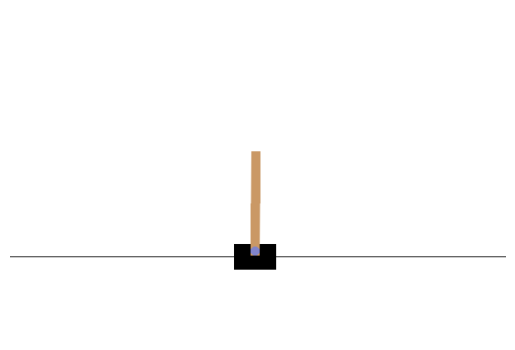

In [11]:
env = gym.make('CartPole-v1', render_mode = "rgb_array")
observation = env.reset()
render_as_image(env)

In [12]:
if not os.environ.get('DISPLAY'):
    pyvirtualdisplay.Display(visible=0, size=(608, 400)).start()

This loop is used for creating and seeing the performance of a random agent. rec is used to save the frames and display them in a form of a video. We are taking 100 steps in this simulation, and whenever the game would have ended normally (done=True), we reset althoug we could also terminate but the video would be even shorter. Before even doing anything we call env.reset() this is standard and should be done always before running the environment (just after gym.make) or after done becomes True.

In the loop, we record the frame, and take a random available action using env.action_space.sample(), env.action_space displays all available actions, .sample() takes a random sample. We can also use env.observation_space which contains all available states (Though it is not applicable here).

Afterwards, we use env.step(action) to make the agent perform some action, the state returns following values: observation, reward, terminated, truncated, info

* observation - "what the agent sees"
* reward - reward signal from the action
* terminated - if the simulation ended or not ("Game Over")
* trunacted - if the output was truncated
* info - Additionall information not found in the remaining variables

In [13]:
rec = VideoRecorder()
obs = env.reset()
for i in range(100):
    rec.record_frame(env)
    action = env.action_space.sample()
    obs, reward, done, _, info = env.step(action)
    if done:
        env.reset()

In [14]:
rec.close()
embed_video(rec.filename)

Showing some example return values for basic functions, reset() returns the initial observation, in this case a 4 element array, but could be way more complicated for other games.

Action space shows the available actions, there are 3 possible classes in Gymnasium: Discrete, Box, Tuple. Discrete includes actions that are exclusive categorical values, like 0, 1, 2, etc. Action can only be one of those. Box means a float between some variables, like 0 or 1, the action can be 0 or 0.345555, or it could be anything else between 0 and 1 (inclusive). Tupple combines both for more complicated control/RL tasks.

observation_space includes observations provided by the environment.

In [15]:
initial_observation = env.reset()
initial_observation

(array([ 0.04376011,  0.02781714,  0.02724885, -0.04864962], dtype=float32),
 {})

In [16]:
env.action_space

Discrete(2)

In [17]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [18]:
env.step(0)

(array([ 0.04431645, -0.16768473,  0.02627586,  0.2525045 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [19]:
env.action_space.sample()

0

In [20]:
env.observation_space.sample()

array([-1.0540190e+00,  1.5065285e+38,  1.2478665e-01,  3.0667413e+38],
      dtype=float32)

### Random Agent in Gymnasium

Just like before we define a random agent but this time calculate the total reward and number of steps it took in a simulation to see how well it performs.

In [21]:
env = gym.make('CartPole-v1', render_mode = "rgb_array")
obs = env.reset()
total_reward = 0.0
total_steps = 0

#if not os.environ.get('DISPLAY'):
#    pyvirtualdisplay.Display(visible=0, size=(600, 400)).start()

rec = VideoRecorder()
obs = env.reset()
while True:
    total_steps+=1
    rec.record_frame(env)
    action = env.action_space.sample()
    obs, reward, done, info, _ = env.step(action)
    total_reward+=reward
    if done:
        break

print("Random Agent Performance:")
print(f"Total Reward: {total_reward}, number of steps: {total_steps}")

Random Agent Performance:
Total Reward: 12.0, number of steps: 12


In [22]:
rec.close()
embed_video(rec.filename)

### Wrappers

Wrappers allow us to edit the behaviour of the created environment without redefining the whole game on our own, also without editing someone else's code. You can create a wrapper by defining a class inheriting from the Wrapper class, then you can call the environment the same way you usually would but you can also edit the output however you wish. Below we double the value of reward for every step and force the agent to only pick action 0 - movement left.

In [23]:
class CustomWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.action_space = gym.spaces.Discrete(1)

    def step(self, action):
        observation, reward, done, _, info = self.env.step(0)
        reward *= 2
        return observation, reward, done, info

env = gym.make('CartPole-v1', render_mode = "rgb_array")
custom_env = CustomWrapper(env)
observation = custom_env.reset()
done = False
total_reward = 0

while not done:
    action = custom_env.action_space.sample()
    observation, reward, done, info = custom_env.step(action)
    total_reward += reward

print("Total Reward:", total_reward)

Total Reward: 18.0


We can also divide these two Wrappers to work independently, into ActionWrapper and RewardWrapper

In [24]:
class ActionWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.action_space = gym.spaces.Discrete(1)

    def step(self, action):
        return self.env.step(0)

class RewardWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)

    def step(self, action):
        observation, reward, done, _, info = self.env.step(action)
        reward *= 2
        return observation, reward, done, info

env = gym.make('CartPole-v1', render_mode = "rgb_array")

custom_env = ActionWrapper(RewardWrapper(env))
observation = custom_env.reset()
done = False
total_reward = 0
while not done:
    action = custom_env.action_space.sample()
    observation, reward, done, _ = custom_env.step(action)
    total_reward += reward

print("Total Reward:", total_reward)

Total Reward: 20.0


Lastly, we can also use concrete wrappers like ActionWrapper instead of Wrapper. Below we defined a more interesting agent that uses a random probability value, and if it is smaller then the epsilon value, it does a random action, otherwise it does the intended action (which is still random in this case because we have not yet defined how to teach the agent anything 🥦)

In [25]:
Action = TypeVar("Action")

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.5):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action: Action) -> Action:
        rand_value = random.random()
        if rand_value < self.epsilon:
            print(f"Random: {rand_value}")
            return self.env.action_space.sample()
        print(f"Not Random: {rand_value}")
        return action

In [26]:
custom_env = RandomActionWrapper(gym.make('CartPole-v1', render_mode = "rgb_array"))
rec = VideoRecorder()
observation = custom_env.reset()
done = False
total_reward = 0

while not done:
    action = 0
    rec.record_frame(custom_env)
    observation, reward, done, _, info = custom_env.step(action)
    total_reward += reward

print("Total Reward:", total_reward)

Not Random: 0.9791676613653295
Not Random: 0.5091664932242029
Random: 0.2820281327239297
Not Random: 0.5928258419733683
Random: 0.08501027110537207
Not Random: 0.8280337801685868
Random: 0.3200222281098689
Random: 0.05179272785769462
Random: 0.3486328679435019
Not Random: 0.7843642560779147
Random: 0.26720110238670336
Random: 0.028510983897955144
Random: 0.46467193987304767
Not Random: 0.6182267141479532
Random: 0.4971070064465205
Random: 0.314812340115624
Total Reward: 16.0


In [27]:
rec.close()
embed_video(rec.filename)

### Other Environments

To prove that the wrappers, the means of displaying the environment and generally all that we talked about works for more than just one environment, we present some other interesting environments below, first we redefine the RandomActionWrapper, but only because we do not want all of those print operations, aside of that everything else stays the same.

In [28]:
class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.5):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action: Action) -> Action:
        rand_value = random.random()
        if rand_value < self.epsilon:
            return self.env.action_space.sample()
        return action

In [29]:
custom_env = RandomActionWrapper(gym.make("Taxi-v3", render_mode = "rgb_array"))
rec = VideoRecorder()
observation = custom_env.reset()
done = False
total_reward = 0

for i in range(1000):
    action = 0
    rec.record_frame(custom_env)
    observation, reward, done, _, info = custom_env.step(action)
    total_reward += reward
    if done:
        break

print("Total Reward:", total_reward)

Total Reward: -2314


In [30]:
rec.close()
embed_video(rec.filename)

In [31]:
custom_env = RandomActionWrapper(gym.make("CliffWalking-v0", render_mode = "rgb_array"))
rec = VideoRecorder()
observation = custom_env.reset()
done = False
total_reward = 0

for i in range(1000):
    action = 0
    rec.record_frame(custom_env)
    observation, reward, done, _, info = custom_env.step(action)
    total_reward += reward
    if done:
        break

print("Total Reward:", total_reward)

Total Reward: -1297


In [32]:
rec.close()
embed_video(rec.filename)

In [33]:
!pip install vizdoom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 23.7 MB/s eta 0:00:00


In [34]:
import gymnasium
from vizdoom import gymnasium_wrapper
rec = VideoRecorder()

env = gymnasium.make("VizdoomCorridor-v0", render_mode = "rgb_array")
custom_env = RandomActionWrapper(env)
observation, info = custom_env.reset()
done = False
total_reward = 0

for _ in range(1000):
    action = 0
    rec.record_frame(custom_env)
    observation, reward, done, _, info = custom_env.step(action)
    total_reward += reward
    if done:
        break

print("Total Reward:", total_reward)

Total Reward: -111.15373229980469


In [35]:
rec.close()
embed_video(rec.filename)

## Task

Create a heuristic/hardcoded agent that performs well on some chosen game

Cliffwalking Solution

In [46]:
rec = VideoRecorder()
env = gym.make("CliffWalking-v0", render_mode = "rgb_array")
observation, info = env.reset()
rec.record_frame(env)
total_reward = 0
actions = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
for j in range(3):
    i=0
    observation, info = env.reset()
    while True:
        observation, reward, done, _, info = env.step(actions[i])
        rec.record_frame(env)
        i+=1
        total_reward += reward
        if done:
            break

print("Total Reward:", total_reward)

Total Reward: -39


In [47]:
rec.close()
embed_video(rec.filename)

CartPole Solution

In [96]:
rec = VideoRecorder()
env = gym.make('CartPole-v1', render_mode = "rgb_array")
obs = env.reset()
total_reward = 0.0
total_steps = 0

obs,info = env.reset()
actions = []
while True:
    total_steps+=1
    rec.record_frame(env)
    if obs[2]<0:
        actions.extend([0,0])
    else:
        actions.extend([1,1])
    action = actions.pop()
    obs, reward, done, info, _ = env.step(action)
    total_reward+=reward
    if done:
        break

print("Random Agent Performance:")
print(f"Total Reward: {total_reward}, number of steps: {total_steps}")

Random Agent Performance:
Total Reward: 53.0, number of steps: 53


In [97]:
rec.close()
embed_video(rec.filename)